# End-to-End Machine Learning Project
## Classifying Iris Species

In this Jupyter Notebook, we will walk through a complete end-to-end machine learning project using a classic dataset: the **Iris dataset**. This dataset contains 150 observations of iris flowers, with four features each (sepal length, sepal width, petal length, and petal width) and a target variable indicating the species of each flower.

## Table of Contents
1. **Introduction and Project Overview**
2. **Data Loading and Overview**
3. **Exploratory Data Analysis (EDA)**
4. **Train-Test Split**
5. **Feature Scaling** (optional, depending on the model)
6. **Model Training and Selection**
7. **Model Evaluation**
8. **Hyperparameter Tuning (GridSearchCV)**
9. **Final Model and Saving**
10. **Conclusions**

Throughout this notebook, we will explain each step of the pipeline in detail, so you can see how a machine learning project is typically structured.

## 1. Introduction and Project Overview

A typical end-to-end machine learning project involves:
1. **Understanding the problem** and formulating hypotheses.
2. **Collecting and loading data** from reliable sources.
3. **Exploratory Data Analysis (EDA)**, which includes investigating patterns, anomalies, missing data, and feature relationships.
4. **Preprocessing/cleaning** the data and transforming features.
5. **Splitting** the data into training and testing (and sometimes validation) sets.
6. **Selecting and training** one or more machine learning models.
7. **Evaluating** model performance using metrics.
8. **Hyperparameter tuning** to optimize model performance.
9. **Deploying or saving** the final model for production.

We will illustrate these steps using the Iris dataset, aiming to classify iris flowers into one of three species:
- Iris Setosa
- Iris Versicolor
- Iris Virginica

Let's begin by loading and examining the data.

## 2. Data Loading and Overview

We will use scikit-learn's built-in **Iris dataset**. This dataset is small and well-suited to illustrate classification. The features are:
1. **sepal length (cm)**
2. **sepal width (cm)**
3. **petal length (cm)**
4. **petal width (cm)**

The target is the iris species, which has 3 classes (Setosa, Versicolor, Virginica).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()

# Convert to a pandas DataFrame for easier manipulation
df_iris = pd.DataFrame(
    data=iris['data'],
    columns=iris['feature_names']
)
df_iris['species'] = iris.target

df_iris.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df_iris['sepal length (cm)']

,sepal length (cm)
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0
...,...
145,6.7
146,6.3
147,6.5
148,6.2


In [ ]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

Let's also check the dimensions of the dataset and see if there are any missing values.

In [ ]:
# Shape of the dataset
print("DataFrame shape:", df_iris.shape)

# Checking for null values
print("\nMissing values in each column:\n", df_iris.isnull().sum())



DataFrame shape: (150, 5)

Missing values in each column:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


## 3. Exploratory Data Analysis (EDA)

### 3.1 Basic Statistics
We will look at basic statistical information like **mean**, **standard deviation**, **min**, **max**, and so on, to get a quick sense of the data.


In [ ]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


From the above, you can see the range of values for each feature. Now let's investigate the distribution of each feature.

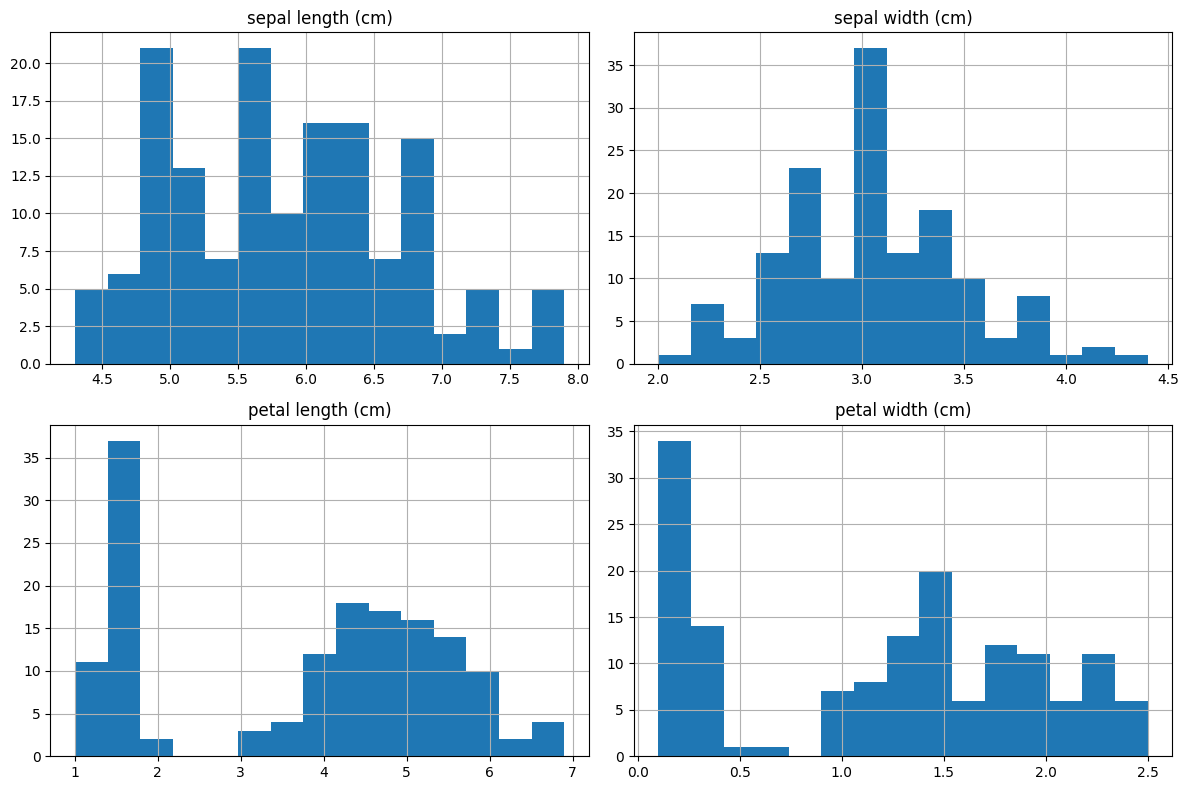

In [ ]:
features = iris.feature_names
#df_iris.columns[:4]
df_iris[features].hist(bins=15, figsize=(12, 8), layout=(2,2))
plt.tight_layout()

plt.show()

### 3.2 Correlation Analysis
Correlation can tell us how features relate to each other and to the target variable. However, in this case, the target variable is categorical, so typical correlation with target doesn't directly apply as it would in a regression setting. But let's look at how features correlate with each other.

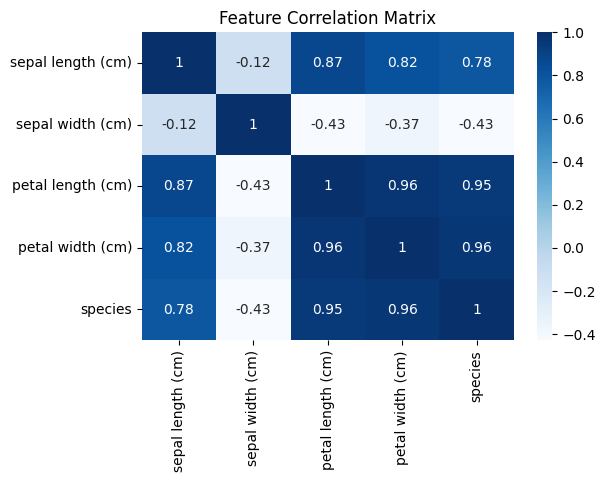

In [ ]:
corr_matrix = df_iris.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Feature Correlation Matrix')
plt.show()

We can see that **petal length** and **petal width** are highly correlated, and **sepal length** also shows some correlation with **petal length**.

### 3.3 Pair Plot
A pair plot (or scatter matrix) allows us to visualize how features are distributed and how they relate to each other, colored by the target class.

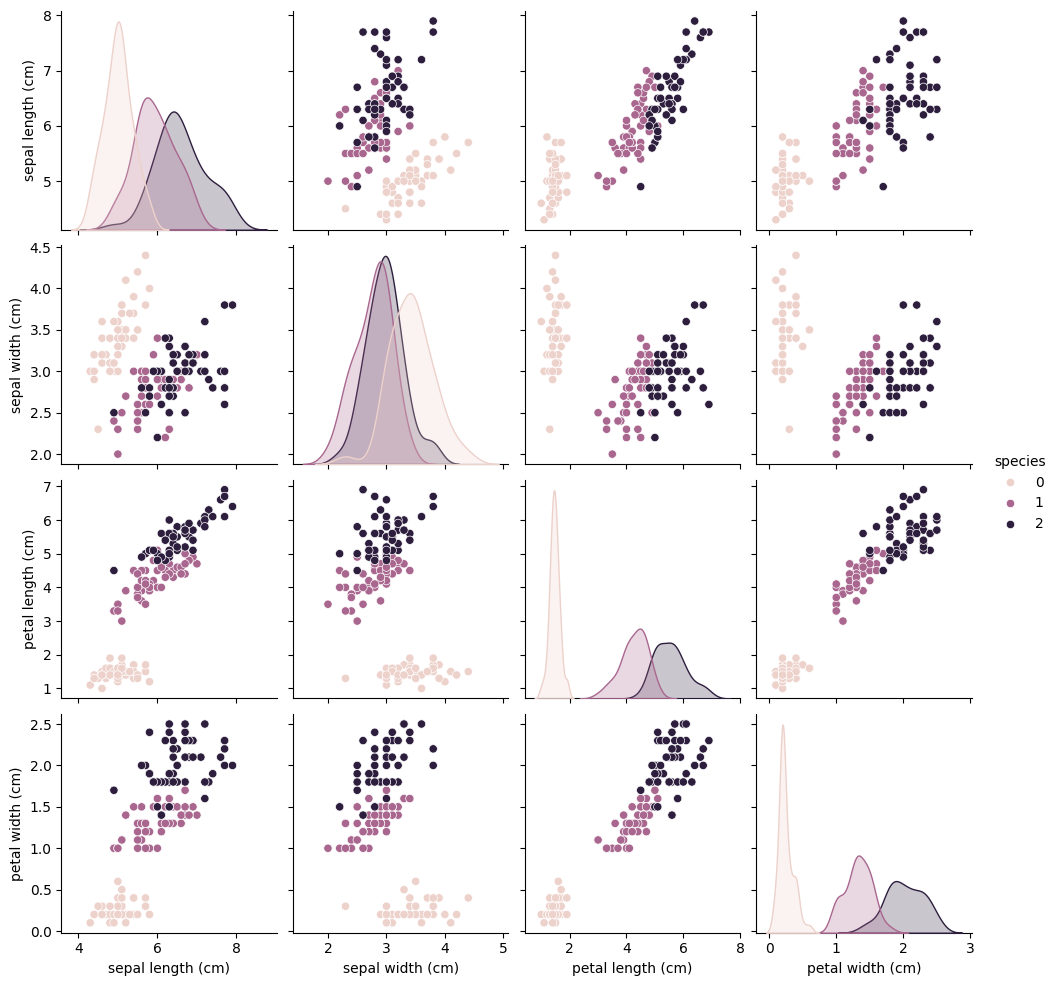

In [ ]:
sns.pairplot(df_iris, hue='species', vars=features)
plt.show()

From the pair plot, you can already see that **Setosa** is well separated from the other two species in terms of petal dimensions. However, **Versicolor** and **Virginica** show some overlap in certain plots.

## 4. Train-Test Split

To evaluate how well our model generalizes, we separate the dataset into training and test sets. Typically, we can use something like **train_test_split** from scikit-learn with an 80-20 split.
This ensures that when we train our model, we do not train on all of the data, leaving some data out to test how well the model performs on unseen data.

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df_iris[features]
y = df_iris['species']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (120, 4)
Test set size: (30, 4)


In [ ]:
X = df_iris[features]
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## 5. Feature Scaling (Optional)

Many machine learning algorithms (especially those based on distance metrics or gradient-based optimization) perform better if features are scaled.

Models like **Logistic Regression**, **SVM**, or **k-NN** typically benefit from scaling. **Decision Trees** or **Random Forests** are often less sensitive to feature scaling.

We'll show how to incorporate scaling using a **Pipeline**.


## 6. Model Training and Selection

We will try a few different classification algorithms:
1. **Logistic Regression**
2. **Random Forest Classifier**

We could include others, but let's start with these. We'll then compare their performance.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Logistic Regression Pipeline
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=2))
])

# Random Forest Pipeline (scaling not strictly necessary, but we include for consistency)
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=2))
])

# Fit Logistic Regression
lr_pipeline.fit(X_train, y_train)
lr_preds = lr_pipeline.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_preds)

# Fit Random Forest
rf_pipeline.fit(X_train, y_train)
rf_preds = rf_pipeline.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)

print(f"Logistic Regression Accuracy: {lr_accuracy:.3f}")
print(f"Random Forest Accuracy: {rf_accuracy:.3f}")

Logistic Regression Accuracy: 0.967
Random Forest Accuracy: 0.967


In [ ]:
rf_pipeline.predict([[5.9, 3. , 5.1, 1.8]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([2])

## 7. Model Evaluation

Accuracy alone doesn't always give the complete picture. For multiclass classification, we often look at the **confusion matrix** and the **classification report**, which includes **precision**, **recall**, and **F1-score** for each class.


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix - Logistic Regression:\n", confusion_matrix(y_test, lr_preds))
print("\nClassification Report - Logistic Regression:\n", classification_report(y_test, lr_preds))

print("Confusion Matrix - Random Forest:\n", confusion_matrix(y_test, rf_preds))
print("\nClassification Report - Random Forest:\n", classification_report(y_test, rf_preds))

Confusion Matrix - Logistic Regression:
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]

Classification Report - Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix - Random Forest:
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]

Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Both Logistic Regression and Random Forest are likely to perform very well on the Iris dataset, often achieving near-perfect accuracy.

## 8. Hyperparameter Tuning (GridSearchCV)

Next, let's demonstrate how to tune hyperparameters using **GridSearchCV**. We'll do this for the **Random Forest** model. We will search over a small range of hyperparameters to see if we can improve performance.

> **Note**: With larger datasets and more hyperparameters, you might want to consider **RandomizedSearchCV** or more sophisticated methods to reduce computation time.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [2, 4, 6, None]
}

grid_search = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Evaluate on the test set
best_rf_model = grid_search.best_estimator_
test_preds = best_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)
print("Test Accuracy with best RF model:", test_accuracy)

print(grid_search)

Best parameters: {'rf__max_depth': 2, 'rf__n_estimators': 200}
Best cross-validation accuracy: 0.9583333333333334
Test Accuracy with best RF model: 0.9666666666666667
GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=2))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [2, 4, 6, None],
                         'rf__n_estimators': [50, 100, 200]},
             scoring='accuracy')


In [ ]:
print(grid_search.cv_results_)

{'mean_fit_time': array([0.1225215 , 0.25188394, 0.73250198, 0.20416942, 0.40014024,
       0.48216472, 0.13296418, 0.2415463 , 0.49064865, 0.16679978,
       0.44163156, 0.71855993]), 'std_fit_time': array([0.0032889 , 0.01127572, 0.15112916, 0.02495628, 0.05206232,
       0.01664547, 0.01439286, 0.00435359, 0.01272829, 0.03376503,
       0.0317081 , 0.18087631]), 'mean_score_time': array([0.01030202, 0.01683178, 0.05431943, 0.01775541, 0.02328277,
       0.02705212, 0.01106224, 0.01605153, 0.02809172, 0.01599545,
       0.02972231, 0.03253584]), 'std_score_time': array([0.00036016, 0.00151768, 0.00712591, 0.0049028 , 0.00441158,
       0.00067923, 0.00067319, 0.00059157, 0.00232809, 0.00550539,
       0.00837214, 0.01181723]), 'param_rf__max_depth': masked_array(data=[2, 2, 2, 4, 4, 4, 6, 6, 6, None, None, None],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value='?',
            dtype=object), 

We can see the best hyperparameters found by the **GridSearchCV** and the corresponding test accuracy. If the dataset is large, hyperparameter tuning can significantly boost performance.

## 9. Final Model and Saving

Assume we have decided to use the best Random Forest model. We can **save** this model using Python's `joblib` or the `pickle` library so that we can load it later to make predictions in production or another environment.

> **Tip**: Always keep track of the version of your data and model code to ensure reproducibility.


In [ ]:
import joblib

# Save the model
joblib.dump(best_rf_model, 'best_rf_model.joblib')
print("Model saved as best_rf_model.joblib")

# To load it back:
# loaded_model = joblib.load('best_rf_model.joblib')

Model saved as best_rf_model.joblib


## 10. Conclusions

We have completed an end-to-end machine learning classification project using the **Iris dataset**. Here's a summary of the steps we took:

1. **Data Loading**: Loaded the Iris dataset using scikit-learn's built-in function.
2. **EDA**: Explored the data with descriptive statistics, histograms, scatter plots, and correlation heatmaps.
3. **Train-Test Split**: Separated the data into training and test sets to evaluate model generalizability.
4. **Feature Scaling**: Demonstrated how to include `StandardScaler` in a pipeline.
5. **Model Training**: Trained two models (Logistic Regression and Random Forest) and compared their accuracies.
6. **Evaluation**: Investigated accuracy, confusion matrices, and classification reports.
7. **Hyperparameter Tuning**: Used `GridSearchCV` to find the best parameters for the Random Forest.
8. **Model Saving**: Demonstrated how to save the best model using `joblib`.

### Key Takeaways
- The Iris dataset is relatively simple, and many common models can achieve very high accuracy.
- Proper **train-test splitting** is crucial for unbiased performance evaluation.
- **Hyperparameter tuning** can improve performance, even on simpler datasets.
- Packaging your preprocessing and model training inside **pipelines** helps ensure reproducibility and maintain a clean workflow.

### Next Steps
- Explore additional models or hyperparameters.
- Look into **cross-validation** for a more reliable estimate of model performance.
- Try to expand your knowledge to other, more complex datasets.

This completes our end-to-end demo with the Iris dataset. In a real-world scenario, you would likely have additional steps around data acquisition, data cleaning (especially if you have missing or erroneous data), feature engineering, and a more thorough model deployment pipeline. Nevertheless, this exercise illustrates the critical steps of a typical classification workflow.